In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [3]:
from google.colab import files
import io
files = files.upload()

Saving Live.csv to Live.csv


In [4]:
df = pd.read_csv(io.BytesIO(files['Live.csv']))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [6]:
# Drop columns that are not useful for clustering
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [8]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [11]:
len(df['status_id'].unique())

6997

In [12]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [13]:
# Drop columns that are not useful for clustering
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [17]:
fig = px.pie(df, names='status_type')
fig.update_layout(title='Status Type', height = 400, width = 600)
fig.show()

In [19]:
# Convert categorical data to numerical data
df = pd.get_dummies(df, columns=['status_type'], drop_first=True)

In [24]:
# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

Inertia, in the context of k-means clustering, refers to the Within-Cluster Sum of Squares (WCSS). It measures how tightly packed the data points are within their assigned clusters.





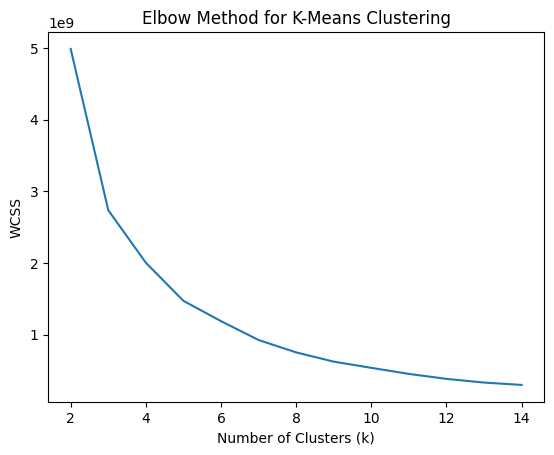

In [42]:
# Define a range of k values to explore
k_range = range(2, 15)  # You can adjust this range
data_processed = df.copy()
# Create a list to store WCSS values for each k
wcss_list = []

for k in k_range:
  # Run k-means for a specific k
  kmeans = KMeans(n_clusters=k, random_state=100)
  kmeans.fit(data_processed)

  # Calculate WCSS for this k
  wcss = kmeans.inertia_
  wcss_list.append(wcss)

# Plot the elbow curve
plt.plot(k_range, wcss_list)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for K-Means Clustering")
plt.show()

In [73]:
# Set the number of clusters
n_clusters = 4 # Replace this with your optimal number of clusters

# Initialize and fit the K-means model
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=100)
clusters = kmeans.fit_predict(df)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters
# Calculate the silhouette score
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f'Silhouette Score: {silhouette_avg}')


# Calculate the Davies-Bouldin index
db_score = davies_bouldin_score(scaled_data, clusters)
print(f'Davies-Bouldin Index: {db_score}')



Silhouette Score: 0.5965246542247051
Davies-Bouldin Index: 1.3714116167017323


A generally accepted rule of thumb for interpreting Silhouette Score:

> 0.7: Strong clustering
0.5 - 0.7: Reasonable clustering
< 0.5: Weak clustering, might need refinement

In [74]:
df['Cluster'].value_counts()

Cluster
0    6325
2     459
3     226
1      40
Name: count, dtype: int64

In [87]:
from sklearn.decomposition import PCA

# Reduce the dimensions of the data to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Create a dataframe with the reduced data and cluster labels
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_df['Cluster'] = clusters

# Plot the clusters using Plotly
fig = px.scatter(reduced_df, x='PC1', y='PC2', color='Cluster',
                 color_continuous_scale='Viridis',
                 title='Clusters Visualized using PCA',
                 labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'})

fig.show()
